<a href="https://colab.research.google.com/github/yuki-tamaribuchi/stats_code_kata/blob/master/affair_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np

In [24]:
df=sm.datasets.fair.load_pandas().data

In [25]:
affair=df['affairs'].values
had_affair=[0 if data==0.0 else 1 for data in affair]
df['Had_Affair']=had_affair

In [26]:
df.keys()

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'Had_Affair'],
      dtype='object')

In [27]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


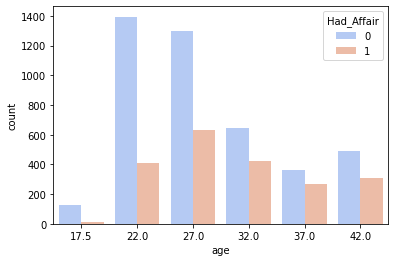

In [30]:
sns.countplot('age',data=df.sort_values('age'),hue='Had_Affair',palette='coolwarm')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


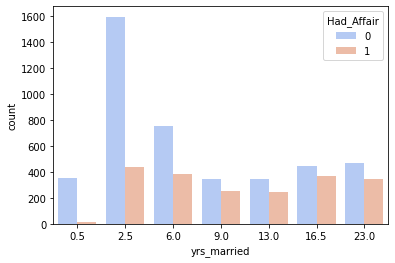

In [28]:
sns.countplot('yrs_married',data=df.sort_values('yrs_married'),hue='Had_Affair',palette='coolwarm')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


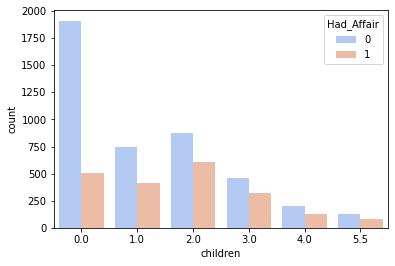

In [29]:
sns.countplot('children',data=df.sort_values('children'),hue='Had_Affair',palette='coolwarm')

In [32]:
occ_dummies=pd.get_dummies(df.occupation)
hus_occ_dummies=pd.get_dummies(df.occupation_husb)

In [37]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [34]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [35]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [42]:
X=df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)
dummys=pd.concat([occ_dummies,hus_occ_dummies],axis=1)
X=pd.concat([X,dummys],axis=1)

In [43]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [44]:
#多重共線性の排除
X=X.drop('occ1',axis=1)
X=X.drop('hocc1',axis=1)
X=X.drop('affairs',axis=1)

In [45]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [48]:
Y=df.Had_Affair
Y=np.ravel(Y)

In [49]:
log_model=LogisticRegression()
log_model.fit(X,Y)
log_model.score(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7265158655356582

In [50]:
coeff_df=pd.DataFrame([X.columns,log_model.coef_[0]]).T

In [51]:
coeff_df

,0,1
0,rate_marriage,-0.70713
1,age,-0.0529454
2,yrs_married,0.0989157
3,children,0.0191549
4,religious,-0.366364
5,educ,0.0160772
6,occ2,0.348943
7,occ3,0.588179
8,occ4,0.318902
9,occ5,0.95585
